## Covid 19 Machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import LinearRgression

In [2]:
df_raw=pd.read_csv("covid_19.csv",dtype=str)
df_raw.head()

,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Digested blood or coffee grounds in vomit,Pain behind eyes or Sensitivity to light,...,Cough with sputum,Cough with heamoptysis,Enlarged lymph nodes,Wheezing,Skin ulcers,Inability to walk,Indrawing of chest wall,Other complications,Specify other complications,Result
0,MALE,1967,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NO,NO,NO,NO,NO,NO,NO,1,NaN,PENDING
1,MALE,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MALE,1988,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
3,MALE,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FEMALE,1978,NO,NO,NO,YES,NO,YES,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE


In [3]:
df_raw.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype
---  ------                                     --------------   -----
 0   Sex                                        109927 non-null  bool 
 1   Birth Year                                 109927 non-null  bool 
 2   Chest pain                                 109927 non-null  bool 
 3   Chills or sweats                           109927 non-null  bool 
 4   Confused or disoriented                    109927 non-null  bool 
 5   Cough                                      109927 non-null  bool 
 6   Diarrhea                                   109927 non-null  bool 
 7   Difficulty breathing or Dyspnea            109927 non-null  bool 
 8   Digested blood or coffee grounds in vomit  109927 non-null  bool 
 9   Pain behind eyes or Sensitivity to light   109927 non-null  bool 
 10  Bleeding from the eyes          

## Data quality issues observed:
- The NaN values are strings
- the column names are not normalized
- Most fields contain binary values and not regularized

### Actions
- normalize column names
- replace NaN with nulls
- set all string observations type to lowercase
- Deal with missing values

In [4]:
# clean up column names
df_raw.columns = (df_raw.columns
                  .str.replace(' ', '_')
                  .str.replace('(', '', regex=False)
                  .str.replace(')', '', regex=False)
                  .str.replace('-', '_')).str.lower()


In [5]:
# make all observation lowercase
for column in df_raw.columns:
    df_raw[column]=df_raw[column].str.lower().str.strip()

In [6]:
df_raw

,sex,birth_year,chest_pain,chills_or_sweats,confused_or_disoriented,cough,diarrhea,difficulty_breathing_or_dyspnea,digested_blood_or_coffee_grounds_in_vomit,pain_behind_eyes_or_sensitivity_to_light,...,cough_with_sputum,cough_with_heamoptysis,enlarged_lymph_nodes,wheezing,skin_ulcers,inability_to_walk,indrawing_of_chest_wall,other_complications,specify_other_complications,result
0,male,1967,no,no,no,no,no,no,NaN,NaN,...,no,no,no,no,no,no,no,1,NaN,pending
1,male,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,male,1988,no,no,no,no,no,no,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,male,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,1978,no,no,no,yes,no,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109922,male,NaN,no,NaN,NaN,no,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
109923,male,1996,no,NaN,NaN,no,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
109924,male,1986,no,NaN,NaN,no,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
109925,male,1996,no,NaN,NaN,no,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative


In [7]:
#convert birth year to numeric
df_raw.birth_year=pd.to_numeric(df_raw.birth_year,downcast='integer')

In [8]:
df_raw.sex.value_counts(normalize=True)#.plot(kind='bar');

sex
male       0.682490
female     0.317464
unknown    0.000037
other      0.000009
Name: proportion, dtype: float64

df_raw.info()

In [9]:
print(f"Originally we have {df_raw.shape[0]} rows and {df_raw.shape[1]} features in the dataset")

Originally we have 109927 rows and 47 features in the dataset


In [10]:
# check for missing data
print("Number of features with missing values",len(df_raw.isnull().sum()) )
## all the 47 features have missing records hower the number varies from feature to feature

Number of features with missing values 47


In [11]:
df_raw.result.unique()

array(['pending', nan, 'negative', 'positive', 'indeterminate'],
      dtype=object)

### clean up target data
- We have to remove any form of ambiguity because this is a classification problem
- Remove any result not negative or positve

In [12]:
df_r = df_raw[df_raw['result'].isin(['negative', 'positive'])]

missing_data = df_raw.isnull().sum() / len(df_raw) * 100
print("Missing data (%)\n", missing_data)

Missing data (%)
 sex                                           2.455266
birth_year                                   13.612670
chest_pain                                   61.683663
chills_or_sweats                             77.387721
confused_or_disoriented                      78.961493
cough                                        61.594513
diarrhea                                     61.709134
difficulty_breathing_or_dyspnea              77.312216
digested_blood_or_coffee_grounds_in_vomit    98.729157
pain_behind_eyes_or_sensitivity_to_light     98.721879
bleeding_from_the_eyes                       98.729157
fatigue_or_general_weakness                  61.649094
fever                                        61.584506
fluid_in_the_lung_cavity                     98.722789
fluid_in_lung_cavity_in_auscultation         78.689494
fluid_in_cavity_through_x_ray                78.698591
bleeding_of_the_gums                         98.729157
headache                                     61

###  Decision
- drop columns whose missing values are >90%
- This we expect to drop columns that are not clinically frequent
- Drop other complications: it's a free text and it is not standadized

In [13]:
threshold = 90
cols_to_drop = missing_data[missing_data > threshold].index
df_r = df_r.drop(columns=cols_to_drop)
print("Dropped columns:", list(cols_to_drop))

# df.drop(columns=['other_complications'],inplace=True)


Dropped columns: ['digested_blood_or_coffee_grounds_in_vomit', 'pain_behind_eyes_or_sensitivity_to_light', 'bleeding_from_the_eyes', 'fluid_in_the_lung_cavity', 'bleeding_of_the_gums', 'malaise', 'pharyngeal_exudate', 'specify_other_complications']


In [14]:
df_r[['sex','result']].value_counts(normalize=True)

sex     result  
male    negative    0.589343
female  negative    0.328522
male    positive    0.057495
female  positive    0.024641
Name: proportion, dtype: float64

> Most of the Columns dropped are not considered frequent as we can see

<Axes: xlabel='sex,result'>

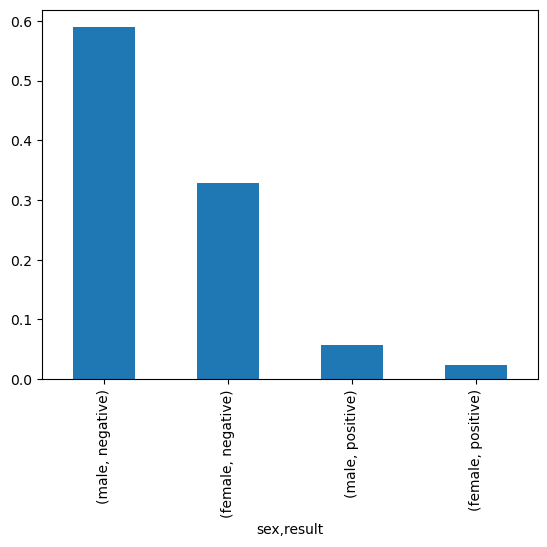

In [15]:
df_r[['sex','result']].value_counts(normalize=True).plot(kind='bar')

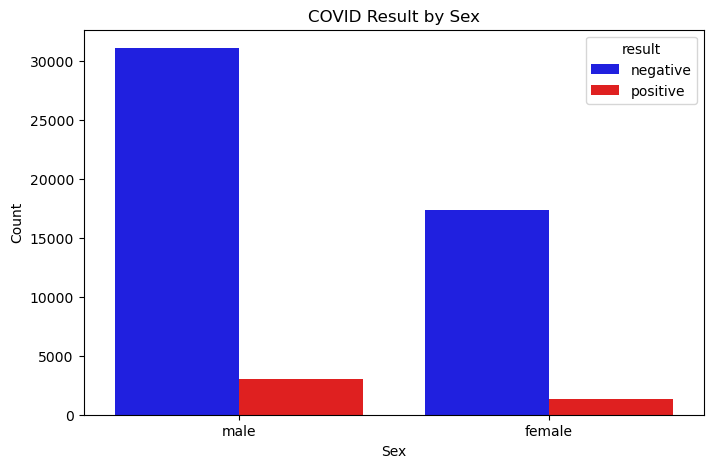

In [16]:

plt.figure(figsize=(8,5))
sns.countplot(data=df_r, x='sex', hue='result', palette=['blue', 'red'])

plt.title("COVID Result by Sex")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()


## Observations
About 64% of males were test and 36% of females were tested.
Of the 34100 males tested, about 6% of them testes positive and of 18618 females, about 3% tested positive

To drill down futher we will compute the positive rate for both genders

In [17]:
# Positivity rate by sex
pos_rate = df_r.groupby('sex')['result'].apply(lambda x: (x=='positive').mean())
print(pos_rate)


sex
female    0.069771
male      0.088886
Name: result, dtype: float64


>Female positivity rate ≈ 6.98% → Among all females in the dataset, about 7 out of 100 tested positive.
>
>Male positivity rate ≈ 8.89% → Among all males, about 9 out of 100 tested positive.
>
>We are not sure add the momement wether this result is significant or not. We will go ahead and do a chi-squared test

In [18]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(df_r['sex'], df_r['result'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)


Chi2: 58.110587476178225 p-value: 2.4778912445169276e-14


Chi2 ≈ 58.11 → the difference between males and females is substantial.

p-value ≈ 2.48e-14 → extremely small, way below 0.05, so the association is highly significant.

**Interpretation**

The likelihood of being COVID-positive depends on sex in the dataset.

Males have a higher proportion of positive results, and this is not due to chance.

## feature engineering: age

The date of data collection was not mentioned. However, we will assumped the year of the data collection to be 2020 because that was the year we recored the covid-19 pandemic 

<Axes: xlabel='age', ylabel='Count'>

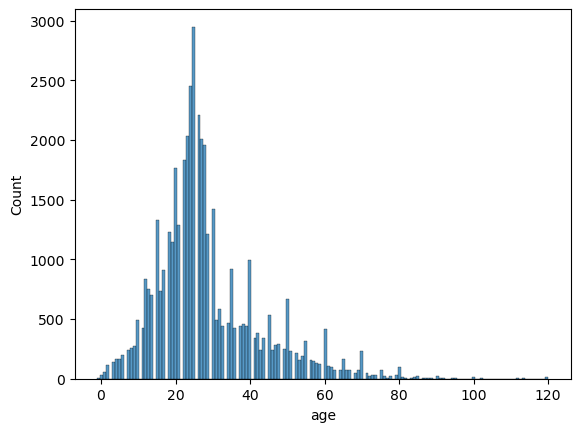

In [19]:
df_r['age']=2020-df_r.birth_year
sns.histplot(df_r.age.dropna())

In [20]:
df_r[['age']].describe()

,age
count,44259.00000
mean,28.47631
std,14.12432
min,-1.00000
25%,20.00000
50%,25.00000
75%,34.00000
max,120.00000


### Observations

About 75% of the patients in this dataset were 34 years and below, representing a vibrant age population

**Actions**
- replace -1 age with median age because the distribution is slightly skewed to the right
- replace other missing values with median score
- Leave the maximum age, 120 because it is medically possible

In [21]:
df_r.loc[df_r['age'] < 0, 'age'] = np.nan
df_r.reset_index(drop=True,inplace=True)
median_age = df_r['age'].median()
df_r['age'] = df_r['age'].fillna(median_age)
df_r.age.isnull().sum()

0

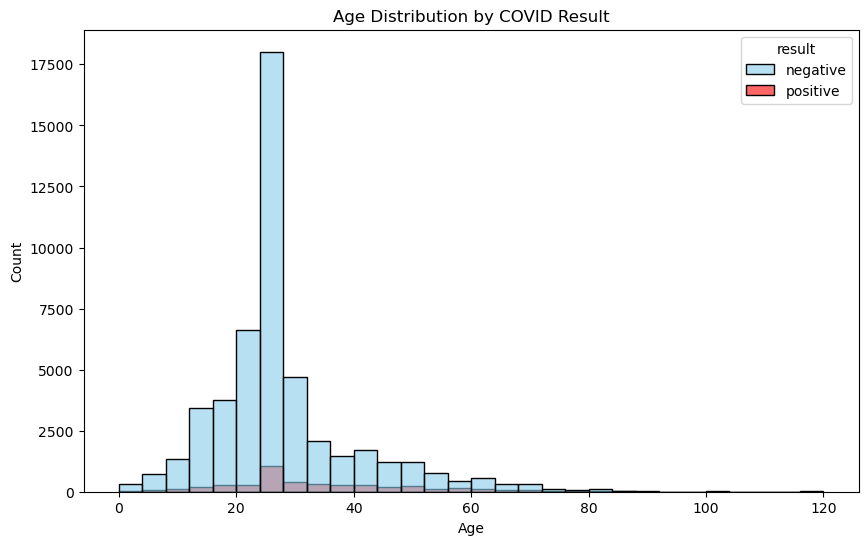

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_r, x='age', hue='result', bins=30, 
             palette=['skyblue','red'], alpha=0.6, kde=False)

plt.title("Age Distribution by COVID Result")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

> A similar distribution is observed between the postive patients.

In [23]:
#  age bins
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18','19-30','31-45','46-60','61-75','76+']
df_r['age_group'] = pd.cut(df_r['age'], bins=bins, labels=labels)

# Positivity rate per age group
age_pos_rate = df_r.groupby('age_group', observed=True)['result'].apply(lambda x: (x=='positive').mean())

print(age_pos_rate)


age_group
0-18     0.061412
19-30    0.054855
31-45    0.143863
46-60    0.162056
61-75    0.214169
76+      0.203390
Name: result, dtype: float64


### Observations

- Youngest groups (0–30) have the lowest positivity rates (~5–6%).

- Middle-aged and elderly (31–75) show higher positivity rates, peaking at 61–75 (~21%).

- Oldest group (76+) slightly decreases (~20%), maybe due to fewer samples or behavioral factors like staying at home or being mindful of the safety measures announced during the pandemic.

### Clean up other features

In [24]:
df=df_r.copy()
## convert to binary
# convert sex to binary
df['sex']=(df['sex']=='male').astype(int)
df['result']=(df['result']=='positive').astype(int)
binary_columns=df.dtypes[df.dtypes=='object'].index
for col in binary_columns:
    df[col]=(df[col]=='yes').astype(int)


df.drop(columns=['birth_year','age_group'],inplace=True)
print("shape before: ",df.shape)

shape before:  (53701, 39)


## Remove features without variance from the data

In [25]:
from sklearn.feature_selection import VarianceThreshold
print()
selector = VarianceThreshold(threshold=0)
selector.fit(df)  # learn which columns have variance
df_clean = df.loc[:, selector.get_support()]  # keep only non-constant columns
df_clean.reset_index(drop=True,inplace=True)
print("shape after: ",df_clean.shape)


shape after:  (53701, 34)


### Observations
- From the above we have been able to get rid of 5 features without variance
- The next point of action is to examine and subject other binary variables to a statistical test
- We will employ chi-square test to test the association of some of the features with the covid-19 result
- We will take a decision to include features with statiscally significant association test 

In [26]:
# List of binary symptom columns
binary_cols = df_clean.columns[:-2]

significant_features = []

for col in binary_cols:
    contingency = pd.crosstab(df_clean[col], df_clean['result'])
    chi2, p, _, _ = chi2_contingency(contingency)
    if p < 0.05:
        significant_features.append(col)
    print(f"{col}: p-value={p:.3e}")



sex: p-value=2.253e-20
chest_pain: p-value=6.610e-02
chills_or_sweats: p-value=1.439e-04
confused_or_disoriented: p-value=3.790e-01
cough: p-value=2.288e-106
diarrhea: p-value=1.287e-07
difficulty_breathing_or_dyspnea: p-value=1.216e-23
fatigue_or_general_weakness: p-value=8.308e-09
fever: p-value=2.258e-66
fluid_in_cavity_through_x_ray: p-value=1.000e+00
headache: p-value=3.682e-01
joint_pain_or_arthritis: p-value=9.443e-09
thorax_sore_throat: p-value=4.276e-104
muscle_pain: p-value=6.185e-06
nausea: p-value=7.945e-11
other_clinical_symptoms: p-value=1.000e+00
rapid_breathing: p-value=1.465e-01
runny_nose: p-value=1.132e-62
sore_throat_or_pharyngitis: p-value=4.276e-104
vomiting: p-value=1.807e-05
abnormal_lung_x_ray_findings: p-value=1.000e+00
conjunctivitis: p-value=3.180e-01
acute_respiratory_distress_syndrome: p-value=1.000e+00
pneumonia_clinical_or_radiologic: p-value=5.724e-01
loss_of_taste: p-value=2.548e-08
loss_of_smell: p-value=3.296e-07
cough_with_sputum: p-value=1.000e+00


In [27]:
print("Significant features:", significant_features)

Significant features: ['sex', 'chills_or_sweats', 'cough', 'diarrhea', 'difficulty_breathing_or_dyspnea', 'fatigue_or_general_weakness', 'fever', 'joint_pain_or_arthritis', 'thorax_sore_throat', 'muscle_pain', 'nausea', 'runny_nose', 'sore_throat_or_pharyngitis', 'vomiting', 'loss_of_taste', 'loss_of_smell']


In [28]:
print("The number of binary features are are considering in the prediction is",len(significant_features))

The number of binary features are are considering in the prediction is 16


> The number of features have significantly drop from 34 to 18 (16 + results,age)
> 

## Final feature selection

In [40]:
df_clean=df_clean[significant_features+['age','result']].reset_index(drop=True)

# Summary
- We worked on a covid-19 data set originaally containing 109927 observations and 47 features
- We systematically cleaned the dataset, and handled missing information
- For most symtomps, we assumed no or nothing to be 0.
- We statistically tested the associations between each feature and the target feature
- We are down to 53701 observations and 16 features in all

# Conclussion
- We will save the resulting data as a csv
- Create a separate notebook for the machine learning

In [43]:
df_clean.to_csv("covid_19_clean_dataset.csv",index=False)